# Indians Diabetes Database

In [5]:
#Necessary packages
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as sp
from scipy.optimize import curve_fit
import warnings
warnings.filterwarnings("ignore")
from sklearn import metrics
from sklearn.cluster import KMeans 
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import RobustScaler 
from sklearn.preprocessing import StandardScaler

# Reading the csv file

In [7]:
#  Reading the csv file
df=pd.read_csv('diabetes.csv')

In [8]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


# Statistical Method

In [9]:
#To view the top rows of a CSV file
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [10]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [11]:
# Number of rows and columns
df.shape

(768, 9)

In [12]:
#maximum value in each column
df.max()

Pregnancies                  17.00
Glucose                     199.00
BloodPressure               122.00
SkinThickness                99.00
Insulin                     846.00
BMI                          67.10
DiabetesPedigreeFunction      2.42
Age                          81.00
Outcome                       1.00
dtype: float64

In [13]:
#minimum value in each column
df.min()

Pregnancies                  0.000
Glucose                      0.000
BloodPressure                0.000
SkinThickness                0.000
Insulin                      0.000
BMI                          0.000
DiabetesPedigreeFunction     0.078
Age                         21.000
Outcome                      0.000
dtype: float64

In [14]:
#To find the median of each column
df.median()

Pregnancies                   3.0000
Glucose                     117.0000
BloodPressure                72.0000
SkinThickness                23.0000
Insulin                      30.5000
BMI                          32.0000
DiabetesPedigreeFunction      0.3725
Age                          29.0000
Outcome                       0.0000
dtype: float64

In [15]:
#To find the mean of each column
df.mean()

Pregnancies                   3.845052
Glucose                     120.894531
BloodPressure                69.105469
SkinThickness                20.536458
Insulin                      79.799479
BMI                          31.992578
DiabetesPedigreeFunction      0.471876
Age                          33.240885
Outcome                       0.348958
dtype: float64

In [16]:
#To find the standard deviation of each column
df.std()

Pregnancies                   3.369578
Glucose                      31.972618
BloodPressure                19.355807
SkinThickness                15.952218
Insulin                     115.244002
BMI                           7.884160
DiabetesPedigreeFunction      0.331329
Age                          11.760232
Outcome                       0.476951
dtype: float64

In [17]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [18]:
#correlation
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


# Basic Visualization

In [19]:
#basic visualization

Text(0, 0.5, 'no of pregnancies')

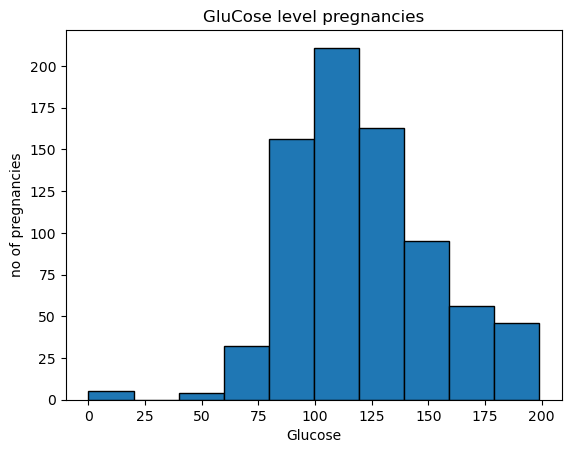

In [24]:
plt.hist(df['Glucose'],edgecolor='black',bins=10)
plt.title ("GluCose level pregnancies")
plt.xlabel("Glucose")
plt.ylabel("no of pregnancies")

Text(0, 0.5, 'Incidence rate')

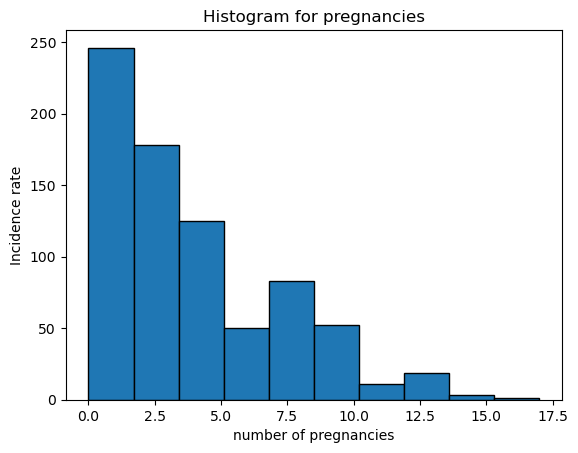

In [21]:
plt.hist(df['Pregnancies'],edgecolor='black',bins=10)
plt.title ("Histogram for pregnancies")
plt.xlabel("number of pregnancies")
plt.ylabel("Incidence rate")


Text(0, 0.5, 'numbe rof pregnancies')

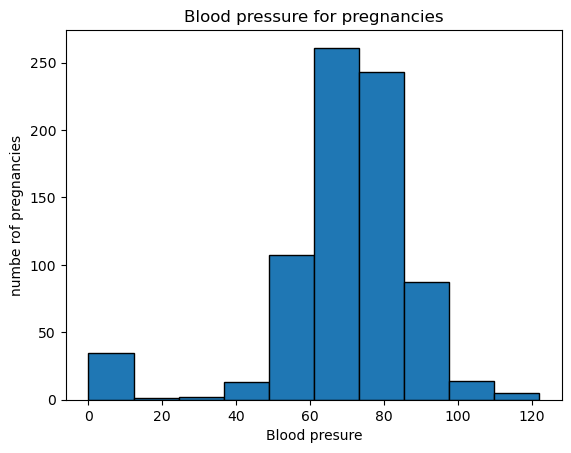

In [25]:
plt.hist(df['BloodPressure'],edgecolor='black',bins=10)
plt.title ("Blood pressure for pregnancies")
plt.xlabel("Blood presure")
plt.ylabel("numbe rof pregnancies")

Text(0, 0.5, 'number of pregnancies')

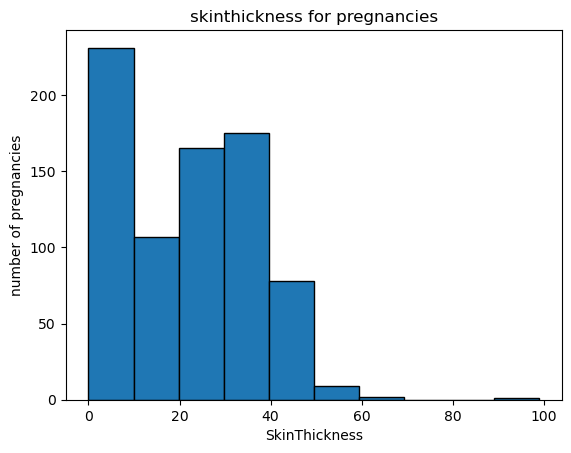

In [26]:
plt.hist(df['SkinThickness'],edgecolor='black',bins=10)
plt.title ("skinthickness for pregnancies")
plt.xlabel("SkinThickness")
plt.ylabel("number of pregnancies")

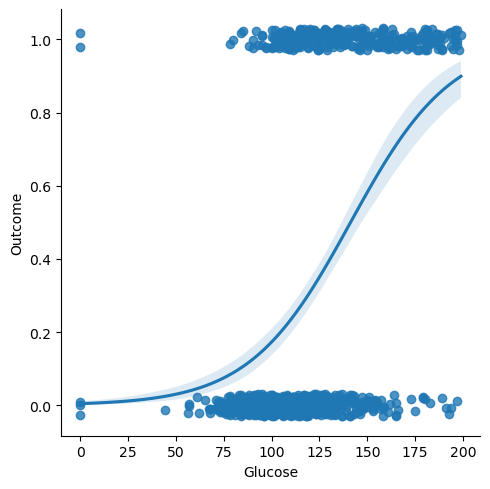

In [56]:
sns.lmplot(x="Glucose", y="Outcome", data=df,
           logistic=True, y_jitter=.03);


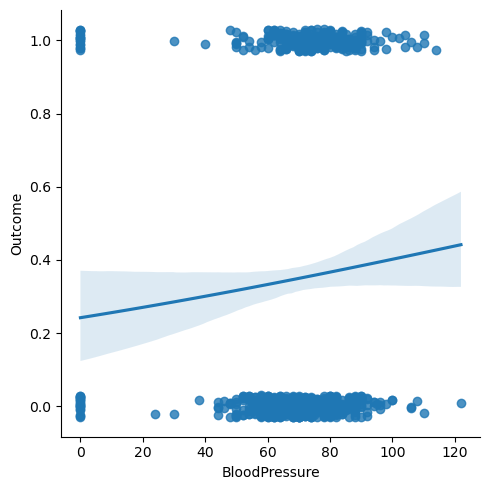

In [57]:
sns.lmplot(x="BloodPressure", y="Outcome", data=df,
           logistic=True, y_jitter=.03);

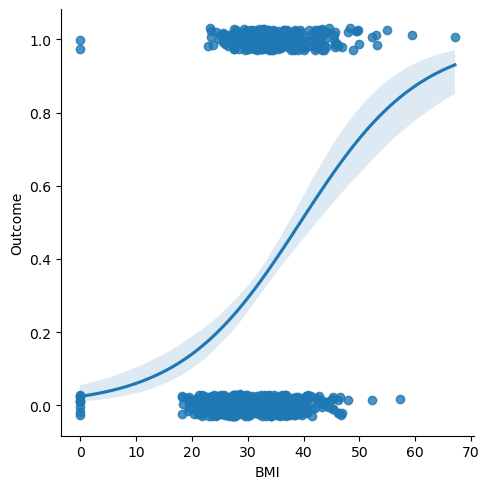

In [35]:
sns.lmplot(x="BMI", y="Outcome", data=df,
           logistic=True, y_jitter=.03);

<Axes: >

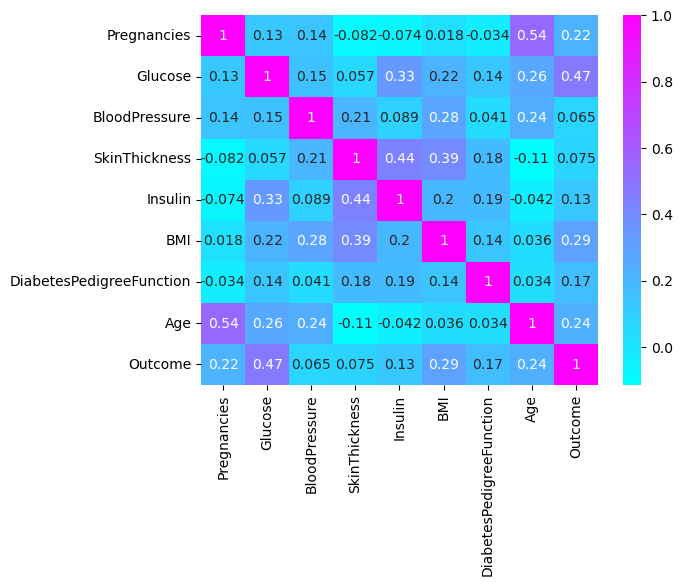

In [36]:
sns.heatmap(df.corr(),cmap='cool',annot=True)

Text(0.5, 0, 'number one to eight represent all the coloumn in dataset df respectively')

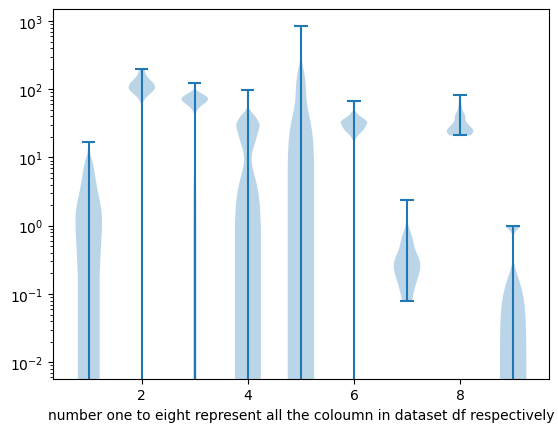

In [37]:
plt.violinplot(df)
plt.yscale('log')
plt.xlabel('number one to eight represent all the coloumn in dataset df respectively')


Text(0.5, 0, 'number one to eight represent all the coloumn in dataset df respectively')

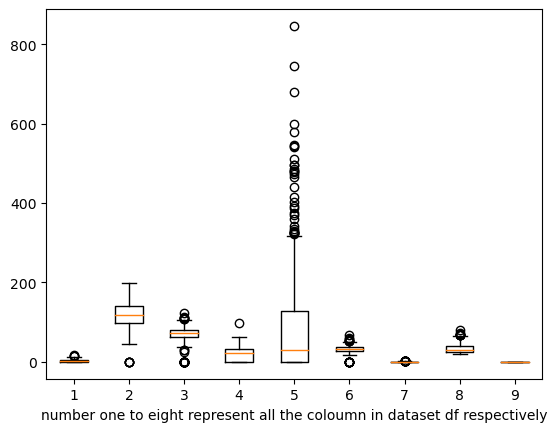

In [38]:
plt.boxplot(df)
plt.xlabel('number one to eight represent all the coloumn in dataset df respectively')

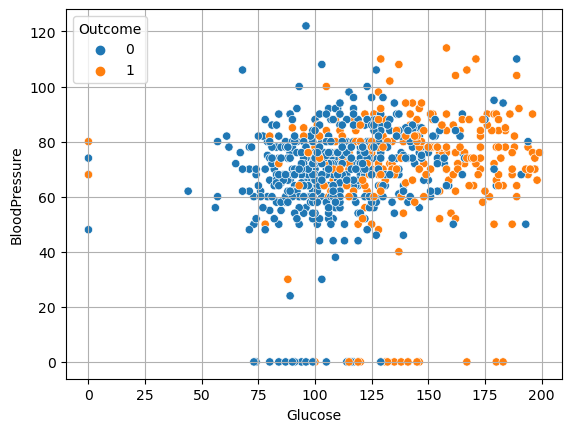

In [39]:
sns.scatterplot(data=df,x='Glucose',y='BloodPressure',hue='Outcome')
plt.grid()

# Fitting

In [40]:
#fitting

In [41]:
group = df.groupby('Pregnancies')
summary=group.mean('Pregnancies')
summary=summary.reset_index()
summary

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,123.000000,67.153153,22.270270,81.675676,34.290090,0.520838,27.603604,0.342342
1,1,112.748148,67.792593,24.437037,98.674074,31.372593,0.486496,27.370370,0.214815
2,2,110.796117,63.252427,21.601942,85.844660,30.583495,0.491660,27.194175,0.184466
3,3,123.586667,66.586667,20.080000,87.453333,30.425333,0.432147,29.026667,0.360000
4,4,125.117647,70.029412,15.882353,69.441176,32.141176,0.446353,32.779412,0.338235
5,5,118.859649,76.210526,17.385965,57.298246,33.192982,0.396421,39.035088,0.368421
6,6,120.800000,68.420000,17.640000,63.580000,30.290000,0.429520,39.340000,0.320000
7,7,136.444444,70.777778,20.288889,84.466667,32.631111,0.443622,41.111111,0.555556
8,8,131.736842,75.184211,17.315789,92.815789,31.568421,0.504711,45.368421,0.578947
9,9,131.392857,77.892857,20.892857,62.428571,31.707143,0.550679,44.178571,0.642857


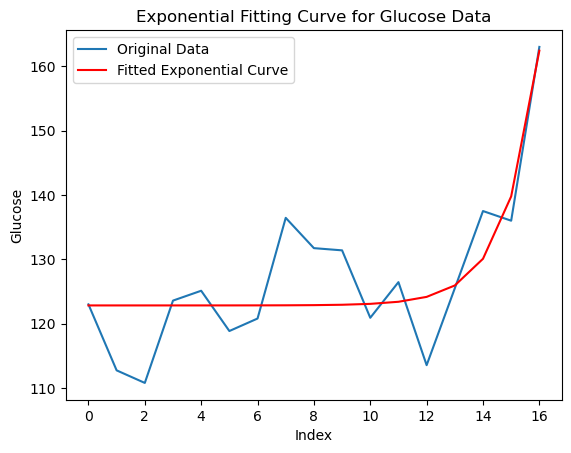

In [42]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Extract Glucose data
Glucose = summary['Glucose']

# Define the exponential function
def exponential_func(x, a, b, c):
    return a * np.exp(b * x) + c

# Provide an initial guess for the parameters
# Here, we assume a=1, b=0, and c=0 as initial guesses
initial_guess = (1, 0, 0)

# Fit the exponential curve with the initial guess
popt, pcov = curve_fit(exponential_func, range(len(Glucose)), Glucose, p0=initial_guess)

# Plot the original data
plt.plot(Glucose, label='Original Data')

# Plot the fitted curve
plt.plot(exponential_func(range(len(Glucose)), *popt), 'r-', label='Fitted Exponential Curve')

plt.xlabel('Index')
plt.ylabel('Glucose')
plt.title('Exponential Fitting Curve for Glucose Data')
plt.legend()
plt.show()

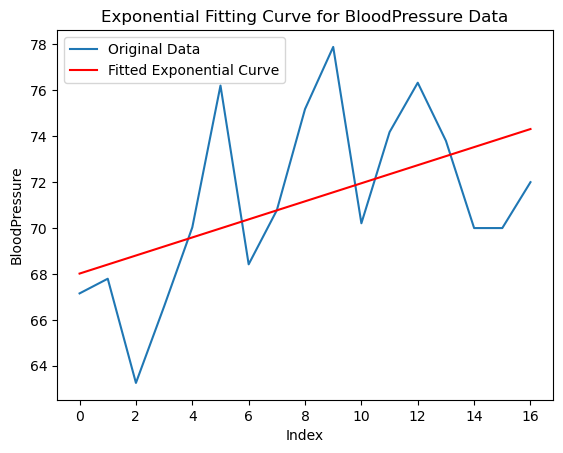

In [43]:
# Extract BloodPressure BloodPressuredata
BloodPressure = summary['BloodPressure']

# Define the exponential function
def exponential_func(x, a, b, c):
    return a * np.exp(b * x) + c

# Provide an initial guess for the parameters
# Here, we assume a=1, b=0, and c=0 as initial guesses
initial_guess = (1, 0, 0)

# Fit the exponential curve with the initial guess
popt, pcov = curve_fit(exponential_func, range(len(BloodPressure)), BloodPressure, p0=initial_guess)

# Plot the original data
plt.plot(BloodPressure, label='Original Data')

# Plot the fitted curve
plt.plot(exponential_func(range(len(BloodPressure)), *popt), 'r-', label='Fitted Exponential Curve')
plt.xlabel('Index')
plt.ylabel('BloodPressure')
plt.title('Exponential Fitting Curve for BloodPressure Data')
plt.legend()
plt.show()

# Clustering

In [44]:
#clustering

In [45]:
# Check for missing values
print(df.isnull().sum())

# Separate features (X) and target variable (if applicable)
X = df.drop('Outcome', axis=1)  # Replace 'target_column_name' with the actual target column

# Standardize the feature variables (if necessary)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


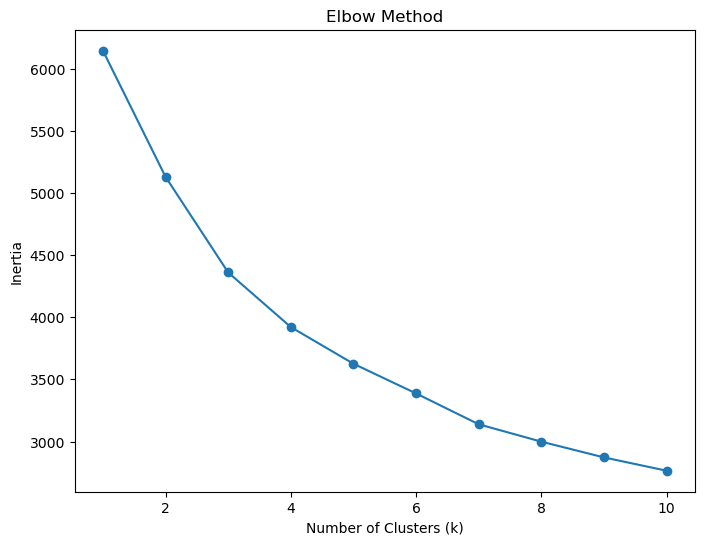

In [46]:
# Elbow method to find the optimal number of clusters (k)
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plotting the Elbow curve
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()


   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


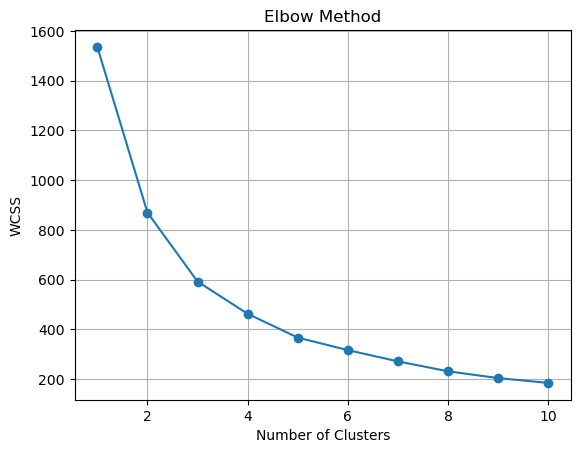

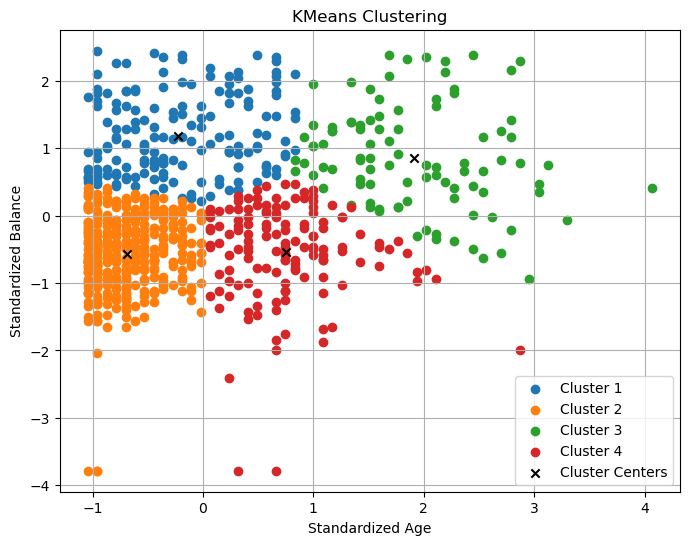

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Load your dataset (replace 'diabetes.csv' with your actual dataset filename)
df = pd.read_csv('diabetes.csv')

# Display basic information about the dataset
print(df.head())  # View the first few rows to understand the structure

# Global variable for StandardScaler
scaler = StandardScaler()

def preprocess_data(data):
    """
    Standardize the relevant columns in the dataset.

    Parameters:
        data: DataFrame containing columns to be standardized.

    Returns:
        ndarray: Standardized data.
    """
    # Assuming 'Age' and 'Balance' are relevant columns in your dataset
    # Modify these column names based on your dataset
    columns_to_scale = ['Age', 'Glucose']  # Update with relevant column names
    scaled_data = scaler.fit_transform(data[columns_to_scale])
    return scaled_data

def perform_elbow_method(data_scaled):
    """
    Calculate the optimal number of clusters using the elbow method.

    Parameters:
        data_scaled: Standardized data.

    Returns:
        integer: Optimal number of clusters.
    """
    wcss = []
    for i in range(1, 11):
        kmeans = KMeans(n_clusters=i, random_state=0)
        kmeans.fit(data_scaled)
        wcss.append(kmeans.inertia_)
    
    # Plotting the elbow method
    plt.plot(range(1, 11), wcss, marker='o')
    plt.xlabel('Number of Clusters')
    plt.ylabel('WCSS')
    plt.title('Elbow Method')
    plt.grid(True)
    plt.show()

    # Manually determine the optimal number of clusters based on the plot
    optimal_num_clusters = 4  # Update with the visually determined optimal value
    return optimal_num_clusters

def visualize_clusters(data_scaled, optimal_num_clusters):
    """
    Visualize the clusters.

    Parameters:
        data_scaled (ndarray): Standardized data.
        optimal_num_clusters (int): Optimal number of clusters.
    """
    kmeans = KMeans(n_clusters=optimal_num_clusters, random_state=0)
    cluster_labels = kmeans.fit_predict(data_scaled)
    cluster_centers = kmeans.cluster_centers_

    plt.figure(figsize=(8, 6))
    for cluster_label in range(optimal_num_clusters):
        plt.scatter(data_scaled[cluster_labels == cluster_label, 0],
                    data_scaled[cluster_labels == cluster_label, 1],
                    label=f'Cluster {cluster_label + 1}')

    plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], marker='x', color='black', label='Cluster Centers')

    plt.xlabel('Standardized Age')
    plt.ylabel('Standardized Balance')  # Update with relevant feature names
    plt.title('KMeans Clustering')
    plt.legend()
    plt.grid(True)
    plt.show()

# Preprocess the data (standardize relevant columns)
data_scaled = preprocess_data(df)

# Calculate the optimal number of clusters using the elbow method
optimal_num_clusters = perform_elbow_method(data_scaled)

# Perform KMeans clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_num_clusters, random_state=0)
cluster_labels = kmeans.fit_predict(data_scaled)

# Visualize the clusters
visualize_clusters(data_scaled, optimal_num_clusters)
